# Machine Learning Mastery
    
    AUTHOR: Dr. Jason Brownlee 

### How to Scale Data With Outliers for Machine Learning

Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard deviation, transforming the probability distribution for an input variable to a standard **Gaussian (zero mean and unit variance)**. Standardization can become skewed or biased if the input variable contains outlier values.

To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as **robust scaling**. 

Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers. One approach to standardizing input variables in the presence of outliers is to **ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable**. This is called robust standardization or **robust data scaling**.

This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR)

$$value = \frac{value - median}{p75 - p25}$$




## Robust Scaler transforms

The robust scaler transform is available in the scikit-learn Python machine learning library via the `RobustScaler` class.

- The `“with_centering”` argument controls whether the value is **centered to zero (median is subtracted)** and defaults to `True`.

- The `“with_scaling”` argument controls whether the value is **scaled to the IQR (standard deviation set to one)** or not and defaults to `True`.

- The definition of the scaling range can be specified via the `“quantile_range”` argument. It **takes a tuple of two integers between 0 and 100 and defaults to the percentile values of the IQR**, specifically (25, 75). Changing this will change the definition of outliers and the scope of the scaling.

In [ ]:
from numpy import mean, std
import pandas as pd

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot

**NOTA**. Sólo se incluye el código del escalamiento robusto, que es lo relevante al tema de Ingeniería de características

In [2]:
# load dataset
dataset = pd.read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]

(208, 61)
    count      mean       std     min       25%      50%       75%     max
0   208.0  0.029164  0.022991  0.0015  0.013350  0.02280  0.035550  0.1371
1   208.0  0.038437  0.032960  0.0006  0.016450  0.03080  0.047950  0.2339
2   208.0  0.043832  0.038428  0.0015  0.018950  0.03430  0.057950  0.3059
3   208.0  0.053892  0.046528  0.0058  0.024375  0.04405  0.064500  0.4264
4   208.0  0.075202  0.055552  0.0067  0.038050  0.06250  0.100275  0.4010
5   208.0  0.104570  0.059105  0.0102  0.067025  0.09215  0.134125  0.3823
6   208.0  0.121747  0.061788  0.0033  0.080900  0.10695  0.154000  0.3729
7   208.0  0.134799  0.085152  0.0055  0.080425  0.11210  0.169600  0.4590
8   208.0  0.178003  0.118387  0.0075  0.097025  0.15225  0.233425  0.6828
9   208.0  0.208259  0.134416  0.0113  0.111275  0.18240  0.268700  0.7106
10  208.0  0.236013  0.132705  0.0289  0.129250  0.22480  0.301650  0.7342
11  208.0  0.250221  0.140072  0.0236  0.133475  0.24905  0.331250  0.7060
12  208.0  0.27

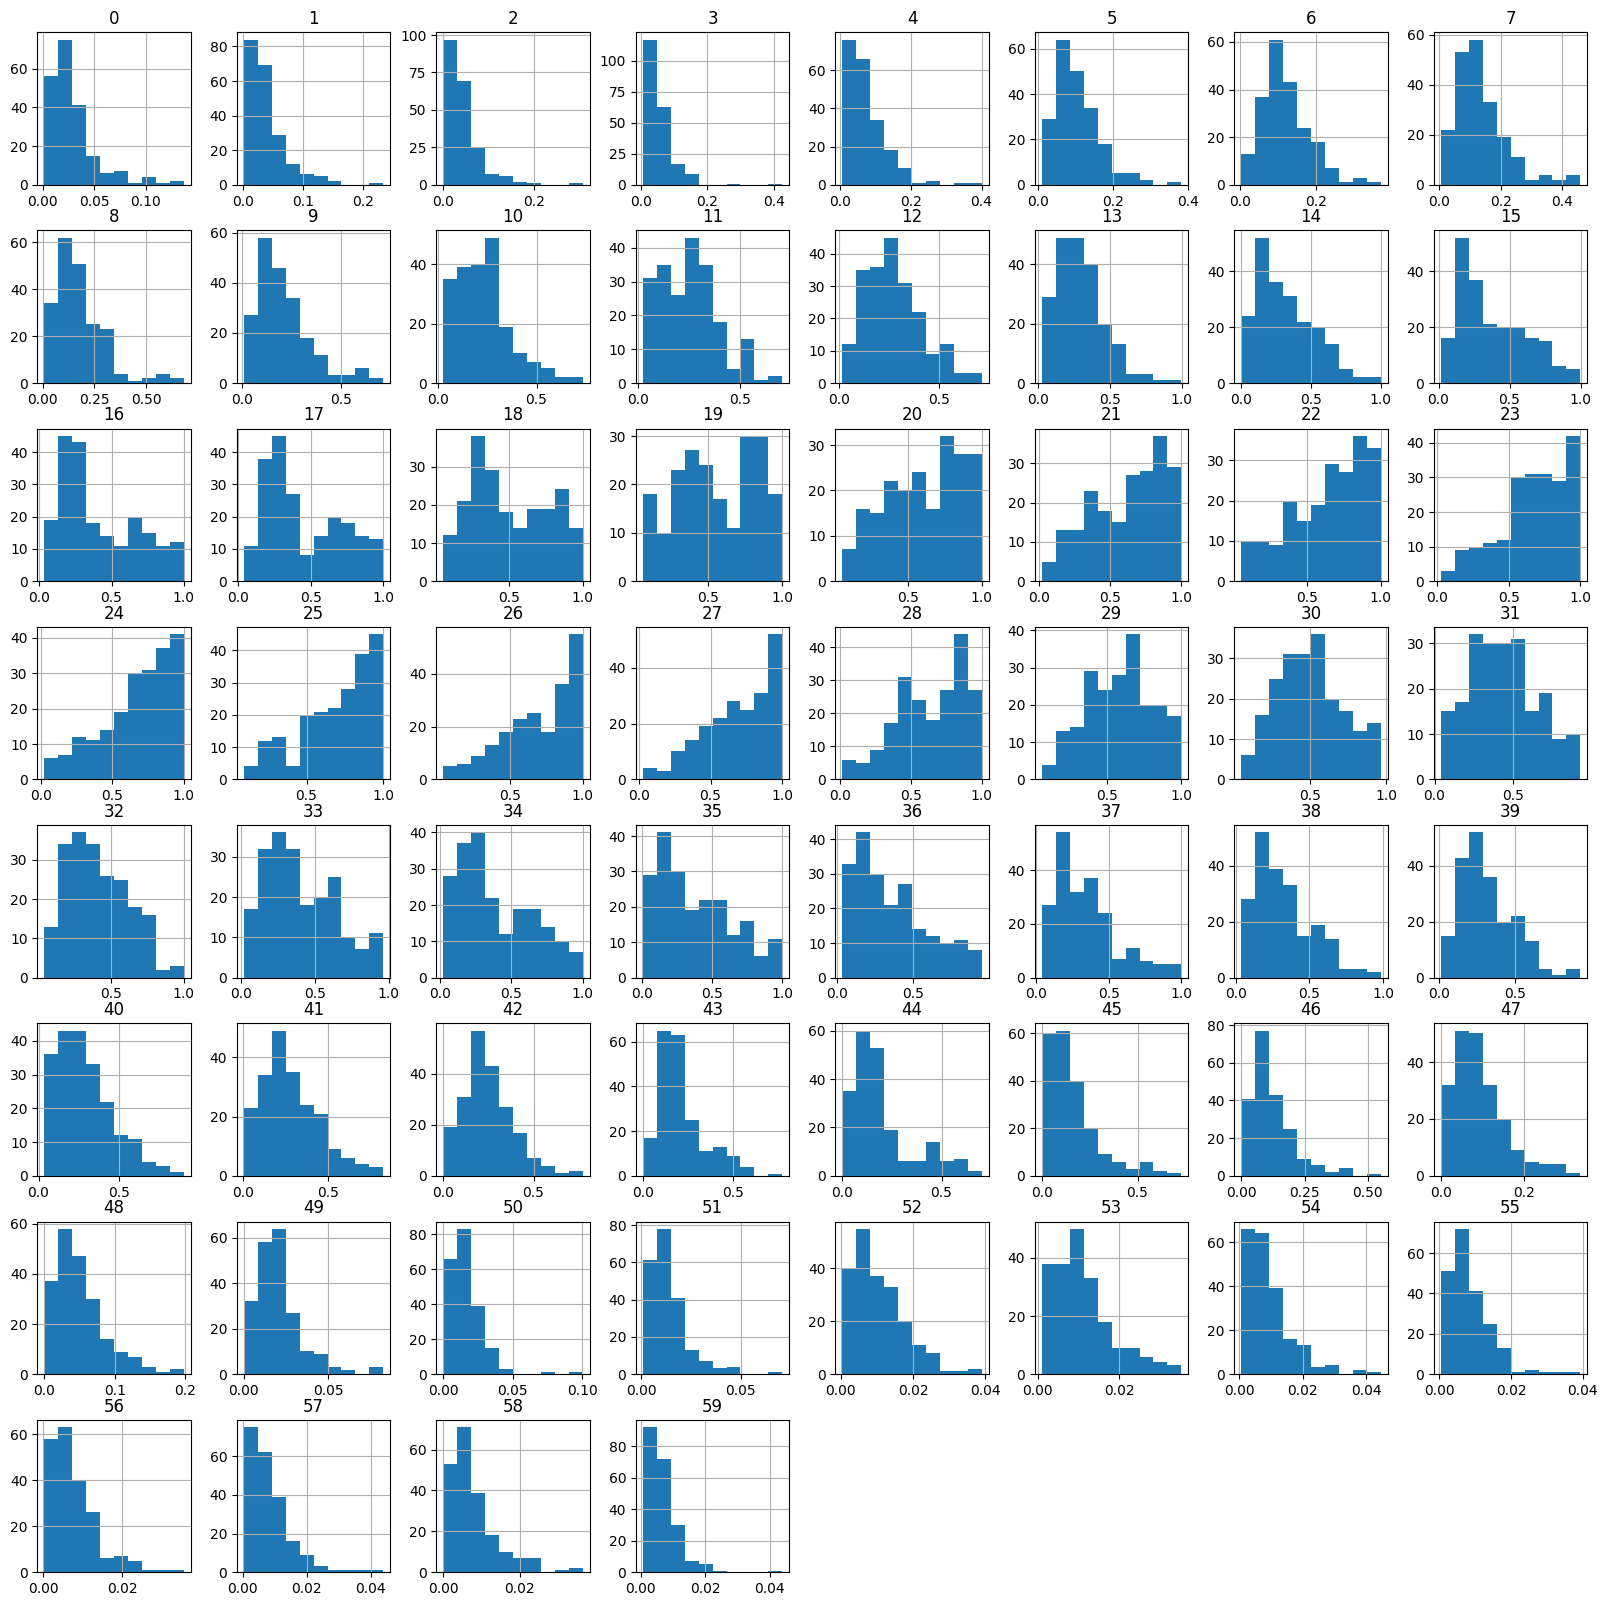

In [3]:
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe().T)
# histograms of the variables
dataset.hist(figsize=(20,20))
pyplot.show()

## Machine Learning model with raw dataset

In [5]:
# Cargamos el dataset directamente del archivo sonar.csv (sin encabezados)
dataset = pd.read_csv("sonar.csv", header=None)

# Obtenemos los valores como un arreglo de NumPy
data = dataset.values

# Separar el dataset en variables de entrada (X) y variable objetivo (y)
# X contendrá todas las columnas menos la última (características numéricas)
# y será la última columna (clase a predecir)
X, y = data[:, :-1], data[:, -1]

# Convertimos las variables de entrada a tipo float32 para garantizar compatibilidad numérica
X = X.astype('float32')

# Transformamos las etiquetas de salida (clases) en números enteros usando LabelEncoder
# Esto es necesario porque los algoritmos de clasificación en scikit-learn requieren etiquetas numéricas
y = LabelEncoder().fit_transform(y.astype('str'))

# Definimos el modelo de aprendizaje: un clasificador K-vecinos más cercanos (KNN)
model = KNeighborsClassifier()

# Configuramos la validación cruzada (cross-validation)
# Usamos 10 particiones (folds), el proceso se repite 3 veces con diferentes combinaciones por aleatorización
# Esto ayuda a obtener una estimación más robusta y confiable del desempeño del modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluamos el modelo utilizando la técnica de validación cruzada definida arriba
# La métrica empleada es la precisión ('accuracy')
# n_jobs=-1 permite el uso de todos los núcleos del procesador para acelerar el proceso
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Reportamos el desempeño del modelo: se imprime la precisión promedio y su desviación estándar
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


## IQR Robust Scaler Transfrom

               0           1             2           3           4   \
count  208.000000  208.000000  2.080000e+02  208.000000  208.000000   
mean     0.286664    0.242430  2.444157e-01    0.245291    0.204137   
std      1.035627    1.046347  9.853362e-01    1.159575    0.892763   
min     -0.959459   -0.958730 -8.410256e-01   -0.953271   -0.896746   
25%     -0.425676   -0.455556 -3.935897e-01   -0.490343   -0.392929   
50%      0.000000    0.000000  8.890458e-17    0.000000    0.000000   
75%      0.574324    0.544444  6.064103e-01    0.509657    0.607071   
max      5.148649    6.447619  6.964103e+00    9.528972    5.439936   

                 5             6             7           8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  208.000000  2.080000e+02   
mean   1.850997e-01  2.024163e-01  2.545449e-01    0.188804  1.642632e-01   
std    8.808560e-01  8.452516e-01  9.548885e-01    0.867941  8.538398e-01   
min   -1.221311e+00 -1.417921e+00 -1.195402e+00   -1

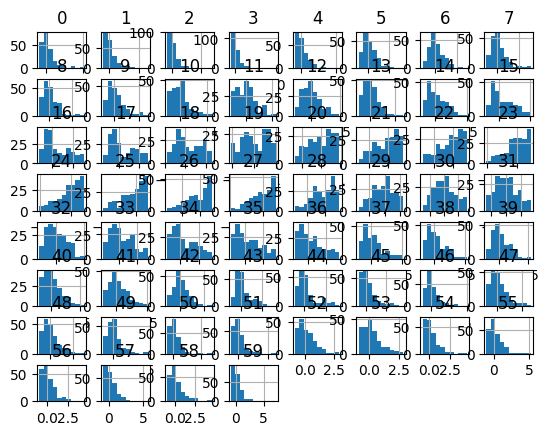

In [10]:
dataset = read_csv("sonar.csv", header = None)

# Retrieve just the numeric values
data = dataset.values[:, :-1]

# Perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)

# Convert the array back to a DataFrame
dataset = pd.DataFrame(data)

# Summarize
print(dataset.describe())

# Histogram of the variables
dataset.hist()
pyplot.show()

    count      mean       std       min       25%  50%       75%       max
0   208.0  0.286664  1.035627 -0.959459 -0.425676  0.0  0.574324  5.148649
1   208.0  0.242430  1.046347 -0.958730 -0.455556  0.0  0.544444  6.447619
2   208.0  0.244416  0.985336 -0.841026 -0.393590  0.0  0.606410  6.964103
3   208.0  0.245291  1.159575 -0.953271 -0.490343  0.0  0.509657  9.528972
4   208.0  0.204137  0.892763 -0.896746 -0.392929  0.0  0.607071  5.439936
5   208.0  0.185100  0.880856 -1.221311 -0.374441  0.0  0.625559  4.324143
6   208.0  0.202416  0.845252 -1.417921 -0.356361  0.0  0.643639  3.638167
7   208.0  0.254545  0.954889 -1.195402 -0.355200  0.0  0.644800  3.890104
8   208.0  0.188804  0.867941 -1.061217 -0.404875  0.0  0.595125  3.889663
9   208.0  0.164263  0.853840 -1.086867 -0.451802  0.0  0.548198  3.355249
10  208.0  0.065040  0.769748 -1.136311 -0.554234  0.0  0.445766  2.954756
11  208.0  0.005922  0.708239 -1.139932 -0.584376  0.0  0.415624  2.310454
12  208.0  0.050535  0.76

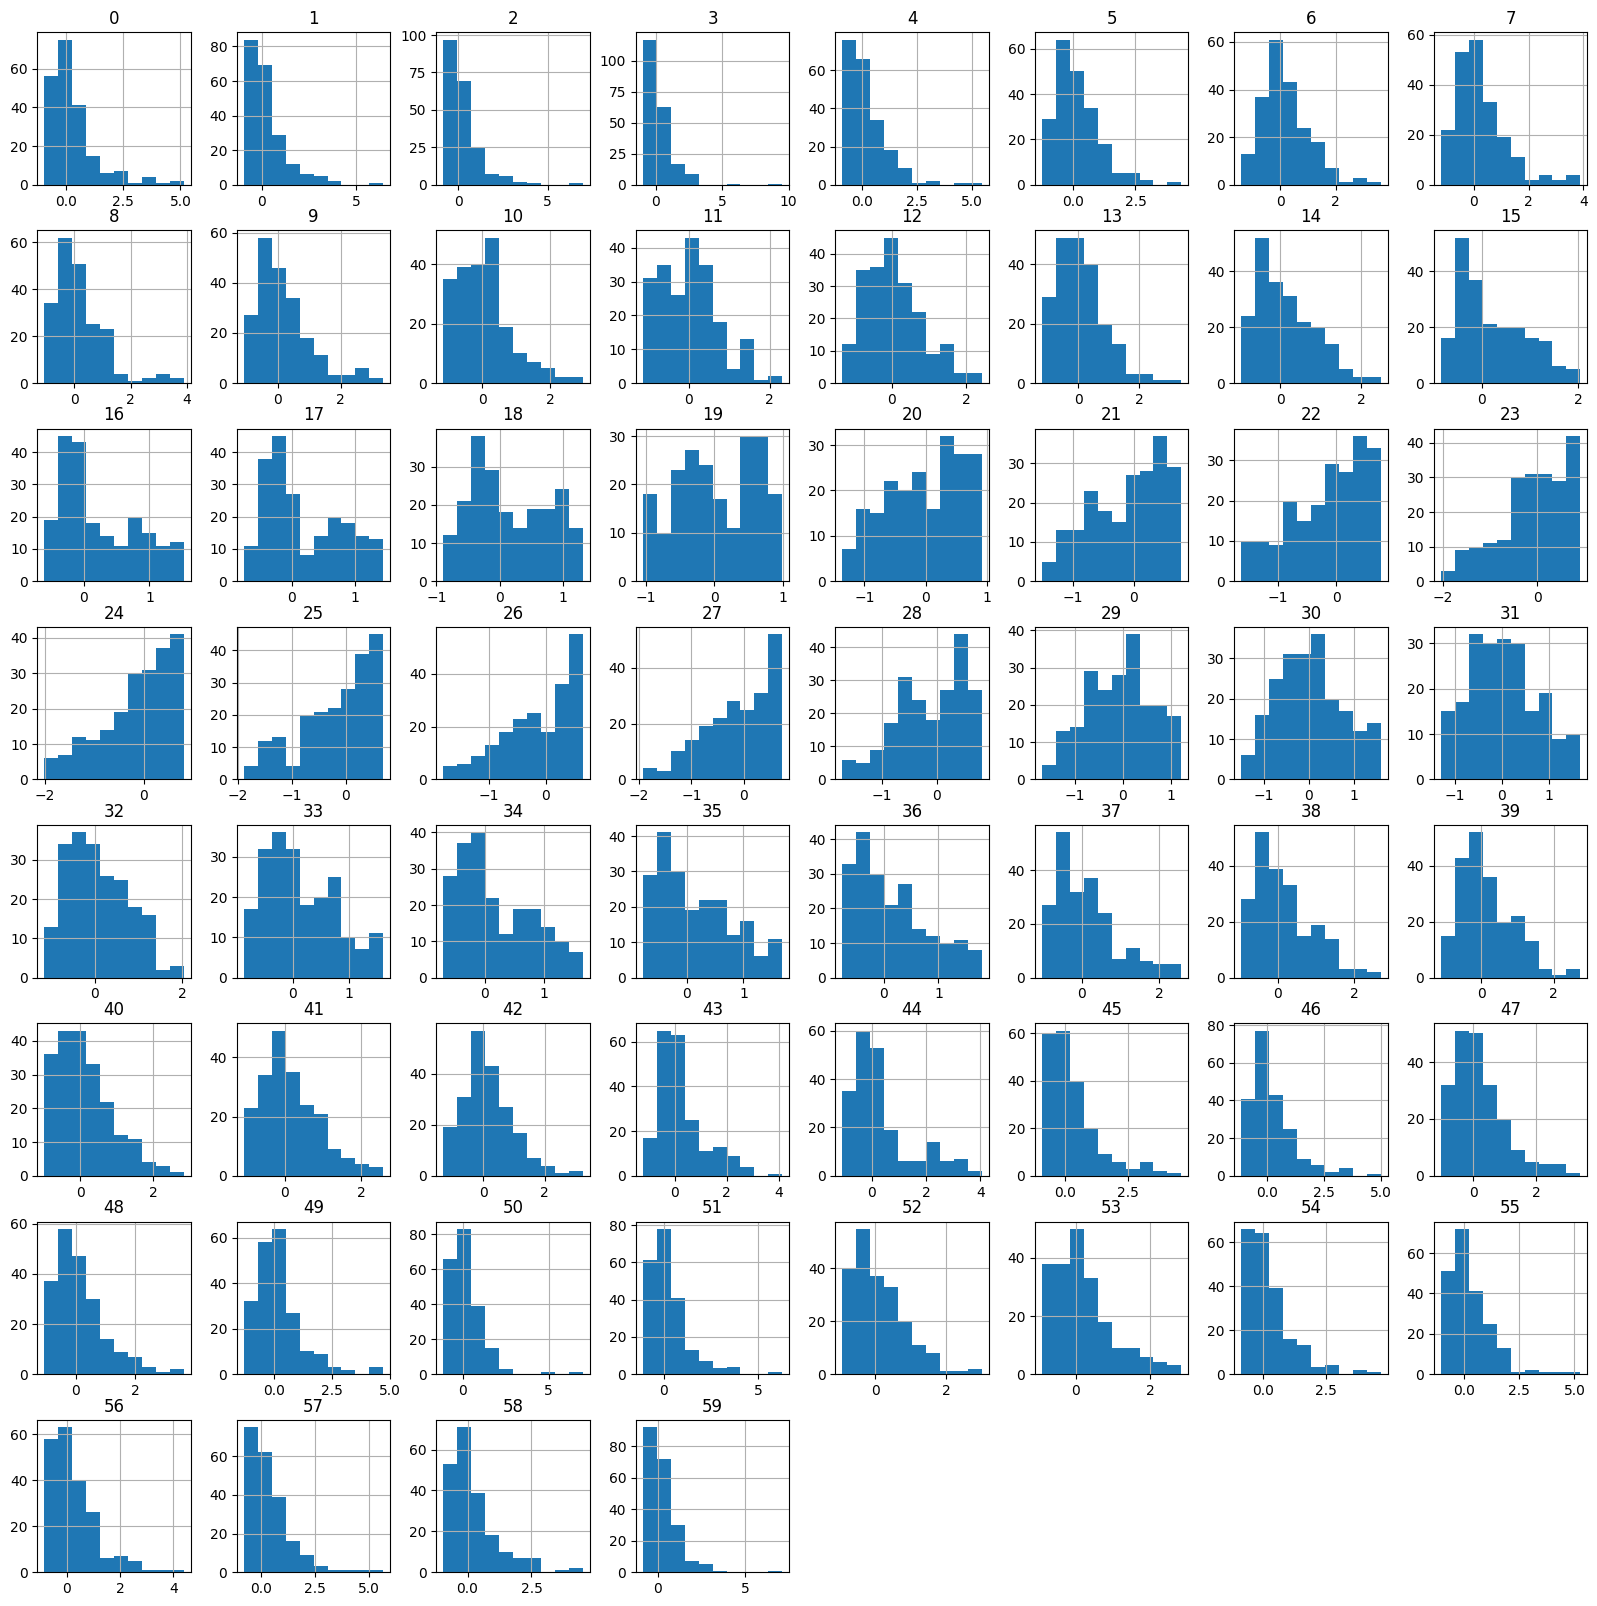

In [11]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe().T)
# histograms of the variables
dataset.hist(figsize=(20,20))
pyplot.show()